In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

# Tải MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Xây dựng mô hình CNN cho nhận diện chữ số
class DigitCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(DigitCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Khởi tạo mô hình
model = DigitCNN().to('cpu')

# Định nghĩa loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to('cpu'), labels.to('cpu')

        # Đặt lại gradient về 0
        optimizer.zero_grad()

        # Forward và backward
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Đánh giá mô hình
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cpu'), labels.to('cpu')
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test accuracy: {100 * correct / total:.2f}%')

# Lưu mô hình
torch.save(model.state_dict(), 'mnist_digit_cnn_model.pth')


Epoch [1/15], Loss: 0.1625
Epoch [2/15], Loss: 0.0473
Epoch [3/15], Loss: 0.0326
Epoch [4/15], Loss: 0.0235
Epoch [5/15], Loss: 0.0196
Epoch [6/15], Loss: 0.0140
Epoch [7/15], Loss: 0.0112
Epoch [8/15], Loss: 0.0113
Epoch [9/15], Loss: 0.0077
Epoch [10/15], Loss: 0.0076
Epoch [11/15], Loss: 0.0061
Epoch [12/15], Loss: 0.0063
Epoch [13/15], Loss: 0.0069
Epoch [14/15], Loss: 0.0031
Epoch [15/15], Loss: 0.0053
Test accuracy: 99.14%


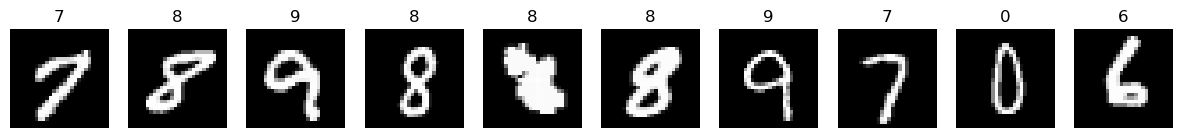

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

# Tải MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Lấy 10 hình ảnh từ train_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Hiển thị 10 hình ảnh cùng với nhãn
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
for i in range(10):
    ax = axes[i]
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(labels[i].item())
    ax.axis('off')
plt.show()